# Explore Google Trends
This notebook delves into querying data from Google Trends.

Tutorial: https://hackernoon.com/how-to-use-google-trends-api-with-python    
Documentation: https://pypi.org/project/pytrends/

In [7]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%pylab inline

from pytrends.request import TrendReq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [2]:
# hl = host language
# tz = time zone (https://forbrains.co.uk/international_tools/earth_timezones?ref=hackernoon.com)

pytrends = TrendReq(hl='en-US', tz=-480)

In [3]:
pytrends.build_payload?

Signature:
pytrends.build_payload(
    kw_list,
    cat=0,
    timeframe='today 5-y',
    geo='',
    gprop='',
)
Docstring: Create the payload for related queries, interest over time and interest by region
File:      /pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/pytrends/request.py
Type:      method


In [16]:
kw_list = ["drought"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='US-WA')

In [20]:
# returns a pandas dataframe
data = pytrends.interest_over_time()
#data = pytrends.interest_by_region()

In [22]:
data

,drought,isPartial
date,,
2004-01-01,0,False
2004-02-01,29,False
2004-03-01,0,False
2004-04-01,28,False
2004-05-01,0,False
...,...,...
2021-10-01,14,False
2021-11-01,12,False
2021-12-01,17,False


Text(0.5, 1.0, '"drought" - Google Trend in WA')

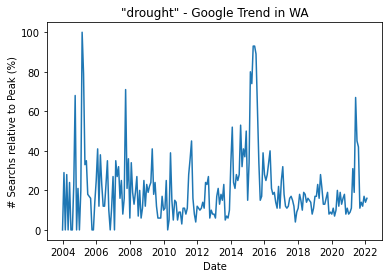

In [25]:
fig, ax = plt.subplots()

ax.plot(data.index, data.drought)
ax.set_xlabel('Date')
ax.set_ylabel('# Searchs relative to Peak (%)')
ax.set_title('"drought" - Google Trend in WA')